# Importing the Necessary Library

In [892]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [895]:
df=pd.read_csv('Data_Sets/Brain_tumor.csv')

# Data explorations and the Initial Inspection

In [701]:
df.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


# Informations about the data

In [704]:
df.info

<bound method DataFrame.info of       Patient ID  Age  Gender    Tumor Type Tumor Grade  Tumor Location  \
0              1   45    Male  Glioblastoma          IV    Frontal lobe   
1              2   55  Female    Meningioma           I   Parietal lobe   
2              3   60    Male   Astrocytoma         III  Occipital lobe   
3              4   50  Female  Glioblastoma          IV   Temporal lobe   
4              5   65    Male   Astrocytoma          II    Frontal lobe   
...          ...  ...     ...           ...         ...             ...   
1995        1996   49  Female    Meningioma           I   Parietal lobe   
1996        1997   57    Male  Glioblastoma          IV  Occipital lobe   
1997        1998   45  Female    Meningioma           I   Temporal lobe   
1998        1999   62    Male   Astrocytoma         III    Frontal lobe   
1999        2000   53  Female  Glioblastoma          IV   Parietal lobe   

                        Treatment    Treatment Outcome  \
0        

In [706]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (2000, 11)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Patient ID,int64,0,0.000,0,2000,2000,1.0,2000.0,1000.5,577.494589,1,2,3
Age,int64,0,0.000,0,31,2000,42.0,72.0,56.153,6.078492,45,55,60
Gender,object,0,0.000,0,2,2000,NaN,NaN,NaN,NaN,Male,Female,Male
Tumor Type,object,0,0.000,0,3,2000,NaN,NaN,NaN,NaN,Glioblastoma,Meningioma,Astrocytoma
Tumor Grade,object,0,0.000,0,4,2000,NaN,NaN,NaN,NaN,IV,I,III
Tumor Location,object,0,0.000,0,4,2000,NaN,NaN,NaN,NaN,Frontal lobe,Parietal lobe,Occipital lobe
Treatment,object,0,0.000,0,7,2000,NaN,NaN,NaN,NaN,Surgery,Surgery,Surgery + Chemotherapy
Treatment Outcome,object,0,0.000,0,4,2000,NaN,NaN,NaN,NaN,Partial response,Complete response,Progressive disease
Time to Recurrence (months),float64,562,0.281,0,13,1438,6.0,36.0,16.099444,3.128291,10.0,NaN,14.0
Recurrence Site,object,562,0.281,0,4,1438,NaN,NaN,NaN,NaN,Temporal lobe,NaN,Frontal lobe


# Vision over a columns in a datasets

In [709]:
list(df.columns)

['Patient ID',
 'Age',
 'Gender',
 'Tumor Type',
 'Tumor Grade',
 'Tumor Location',
 'Treatment',
 'Treatment Outcome',
 'Time to Recurrence (months)',
 'Recurrence Site',
 'Survival Time (months)']

# Listing the categorical and The Numerical Columns

In [712]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [714]:
df.select_dtypes(include=['category','object']).columns

Index(['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment',
       'Treatment Outcome', 'Recurrence Site'],
      dtype='object')

In [716]:
df.select_dtypes(exclude=['category','object']).columns

Index(['Patient ID', 'Age', 'Time to Recurrence (months)',
       'Survival Time (months)'],
      dtype='object')

In [718]:
df.shape

(2000, 11)

In [720]:
list(df.columns)

['Patient ID',
 'Age',
 'Gender',
 'Tumor Type',
 'Tumor Grade',
 'Tumor Location',
 'Treatment',
 'Treatment Outcome',
 'Time to Recurrence (months)',
 'Recurrence Site',
 'Survival Time (months)']

# Handling missing values

In [723]:
df.isnull().sum()  #missing column check 

Patient ID                       0
Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64

# Exploratory Data Analysis (EDA)

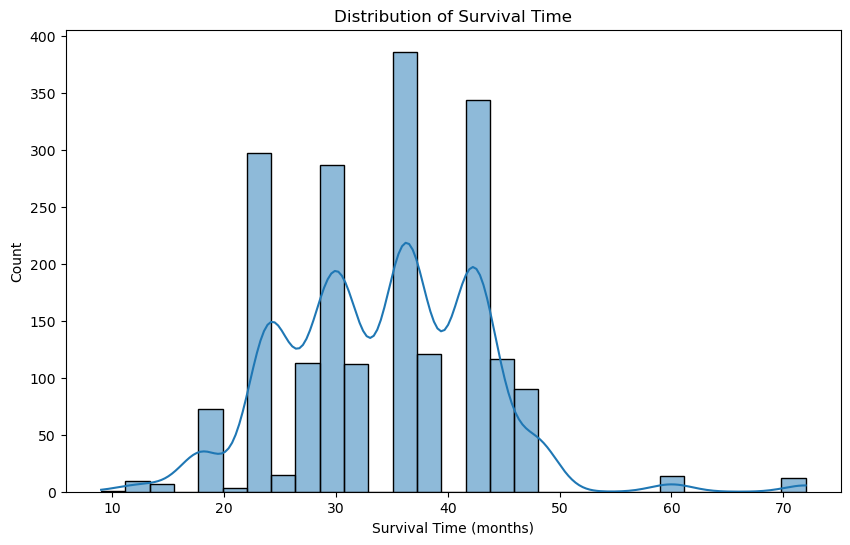

In [726]:
# Distribution of survival time
plt.figure(figsize=(10, 6))
sns.histplot(df['Survival Time (months)'], kde=True)
plt.title('Distribution of Survival Time')
plt.show()

# Proportion of Different Categories
Explore the distribution of various categories within the dataset through pie charts, providing a visual understanding of their proportions.

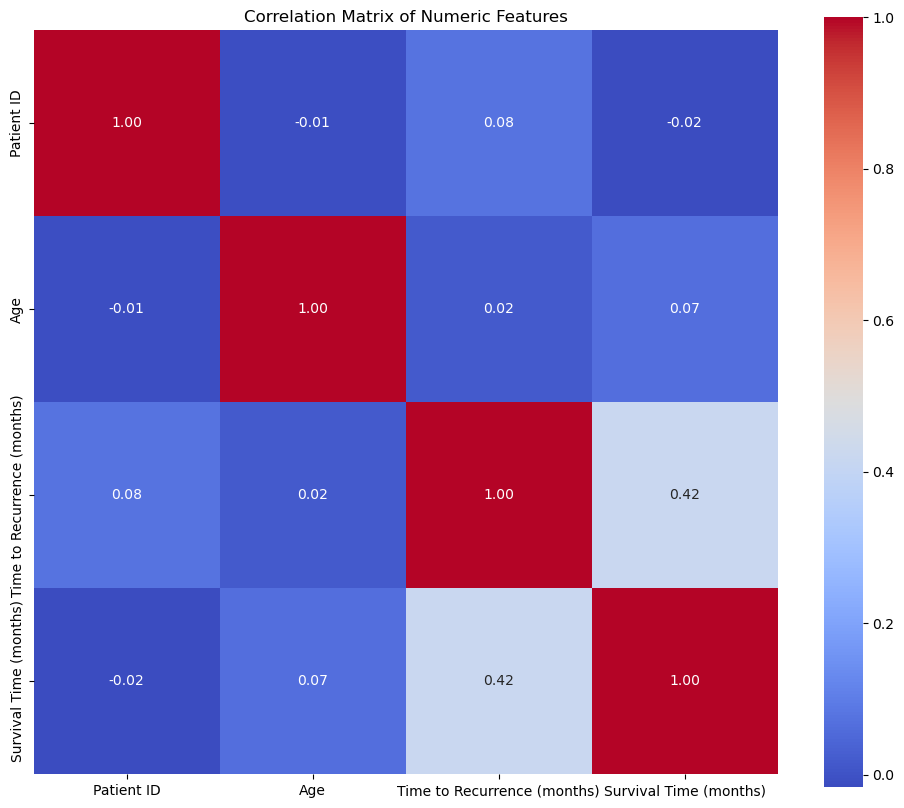

In [729]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df[numerical_columns]

#Compute pairwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

# Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

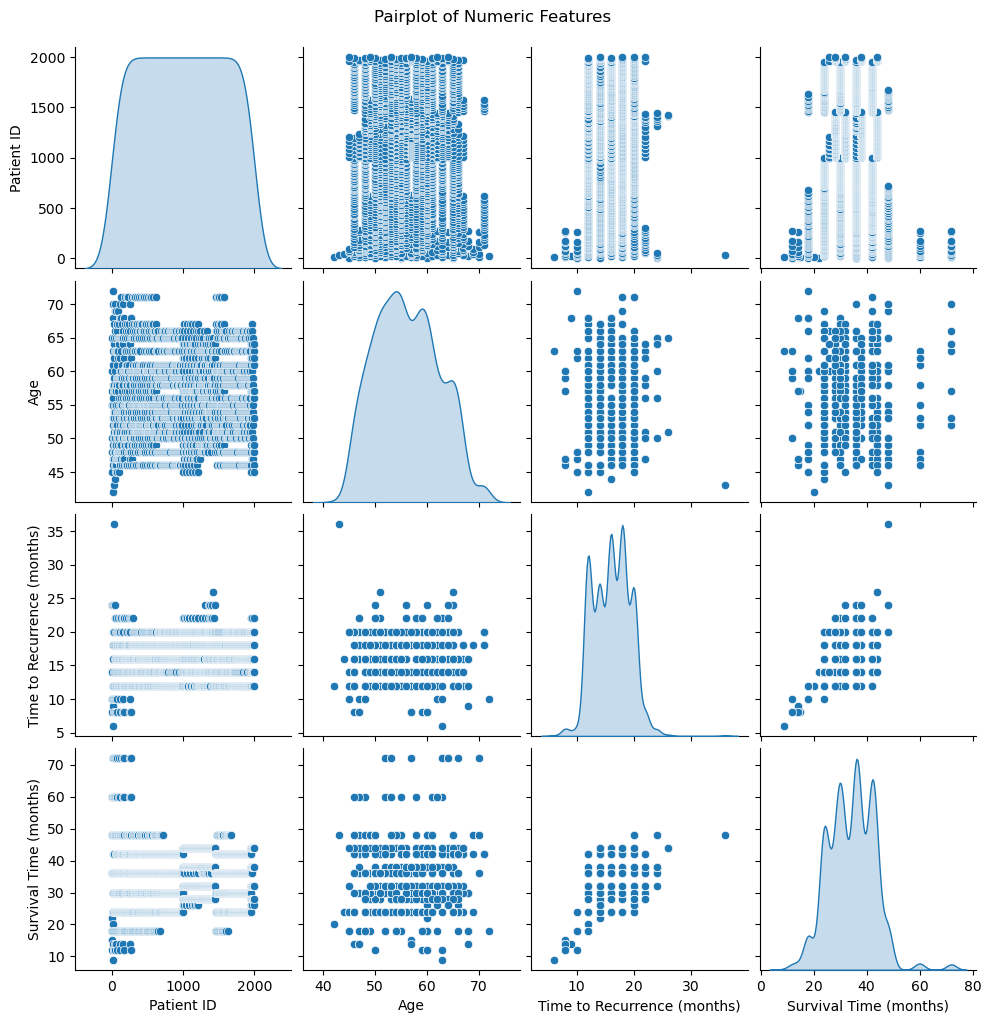

In [731]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [733]:
print(list(df.columns))

['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Time to Recurrence (months)', 'Recurrence Site', 'Survival Time (months)']


In [735]:
#Iterate through each column
for column in df.columns:
    #Get unique values in the column
    unique_values = df[column].unique()
    #print the column name and its unique values
    print(f"Unique values in{column} column:")
    print(unique_values)
    print()#Optional: for separating outputs of different columns#Iterate through each column

Unique values inPatient ID column:
[   1    2    3 ... 1998 1999 2000]

Unique values inAge column:
[45 55 60 50 65 57 48 70 42 58 52 63 47 68 53 49 61 56 72 46 54 59 51 64
 43 67 62 69 44 66 71]

Unique values inGender column:
['Male' 'Female']

Unique values inTumor Type column:
['Glioblastoma' 'Meningioma' 'Astrocytoma']

Unique values inTumor Grade column:
['IV' 'I' 'III' 'II']

Unique values inTumor Location column:
['Frontal lobe' 'Parietal lobe' 'Occipital lobe' 'Temporal lobe']

Unique values inTreatment column:
['Surgery' 'Surgery + Chemotherapy' 'Surgery + Radiation therapy'
 'Surgery + Radiation' 'Chemotherapy' 'Radiation'
 'Chemotherapy + Radiation']

Unique values inTreatment Outcome column:
['Partial response' 'Complete response' 'Progressive disease'
 'Stable disease']

Unique values inTime to Recurrence (months) column:
[10. nan 14. 24.  8. 12. 18.  6.  9. 16. 20. 36. 22. 26.]

Unique values inRecurrence Site column:
['Temporal lobe' nan 'Frontal lobe' 'Parietal lobe' '

### Proportion of Different Categories
Explore the distribution of various categories within the dataset through pie charts, providing a visual understanding of their proportions

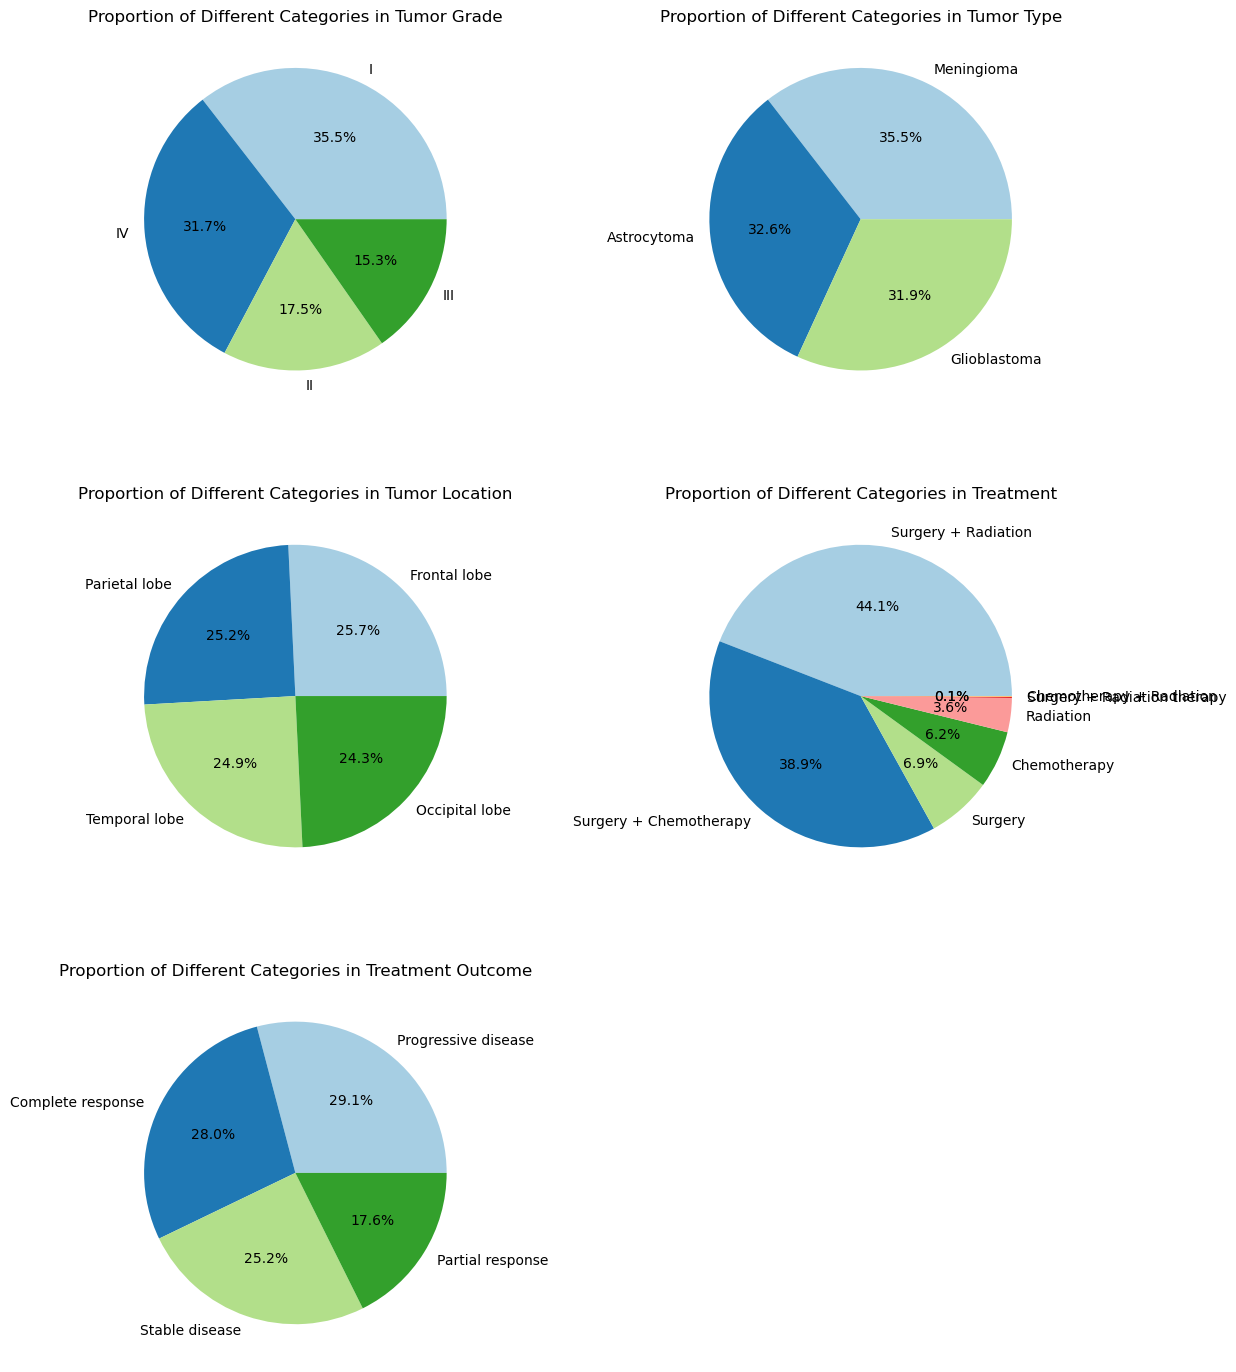

In [738]:
features = ['Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    counts = df[column].value_counts()
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(counts))))
    ax.set_title(f'Proportion of Different Categories in {column}')

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.show()


# Explore Relationships Between Features and Survival Time Using Box Plots

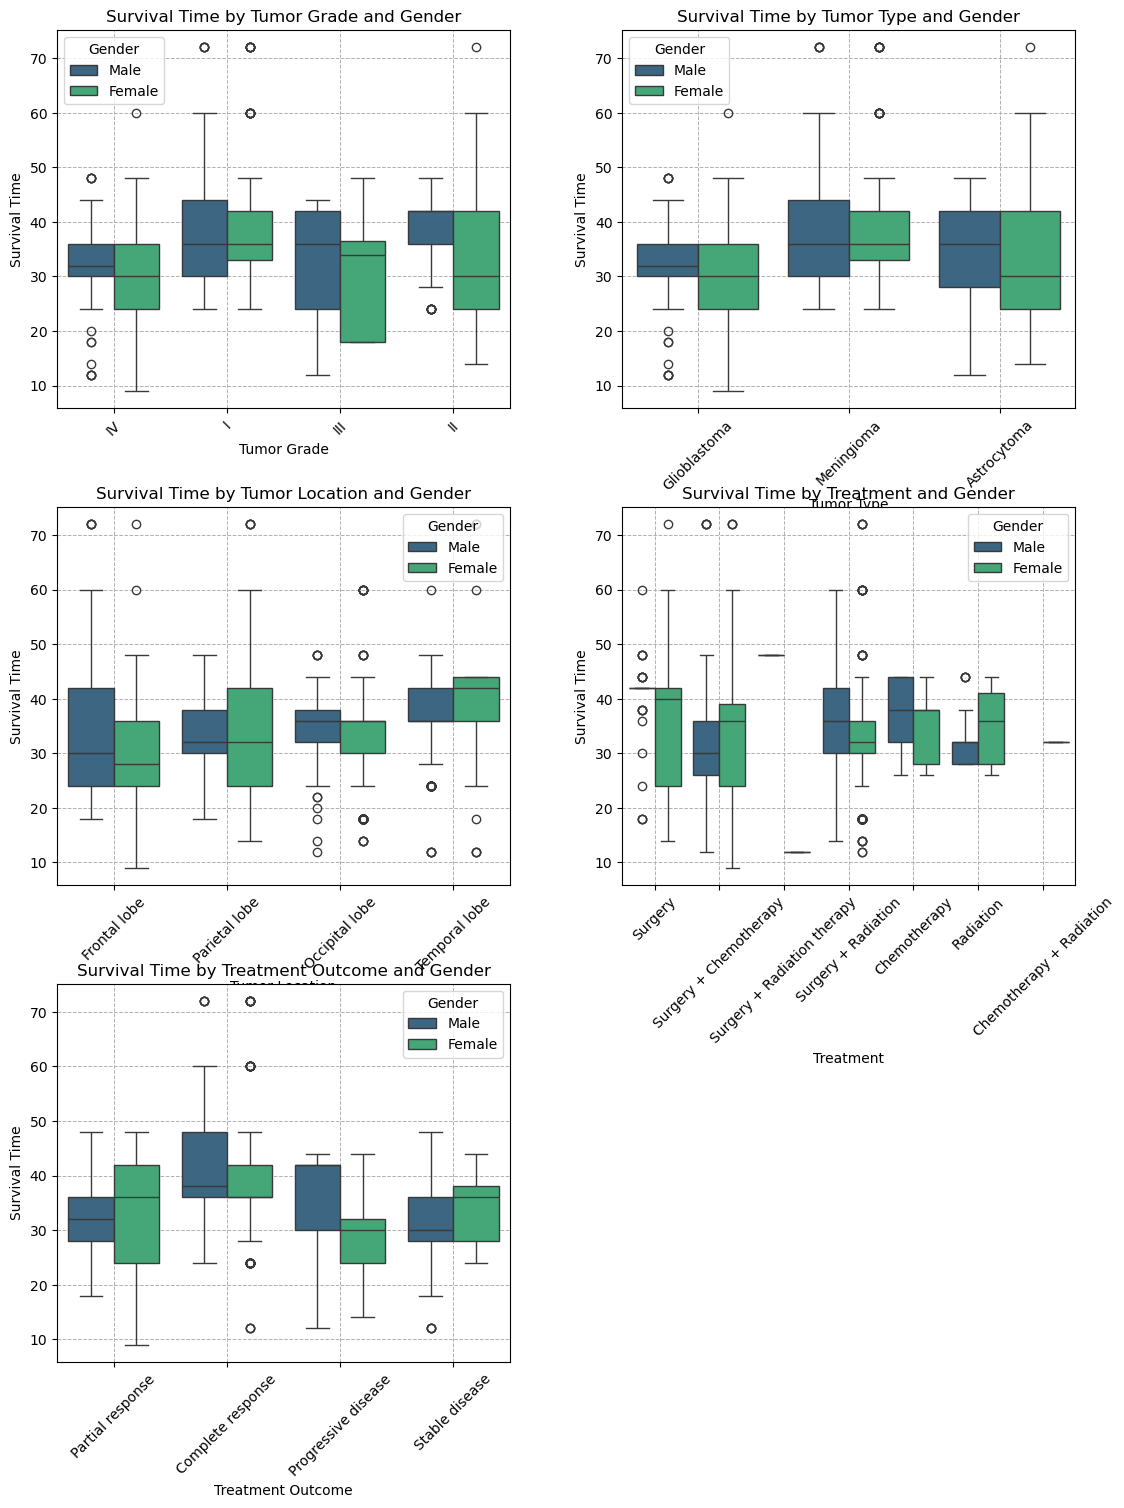

In [741]:
def plot_boxplot(column, df, ax):
    sns.boxplot(x=column, y='Survival Time (months)', data=df, hue='Gender', palette='viridis', ax=ax)
    ax.set_title(f'Survival Time by {column} and Gender')
    ax.set_xlabel(column)
    ax.set_ylabel('Survival Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)  # Add grid lines

features = ['Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    plot_boxplot(column, df, ax)

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.show()


# Explore Relationships Between Features and Survival Time Using Bar Plots

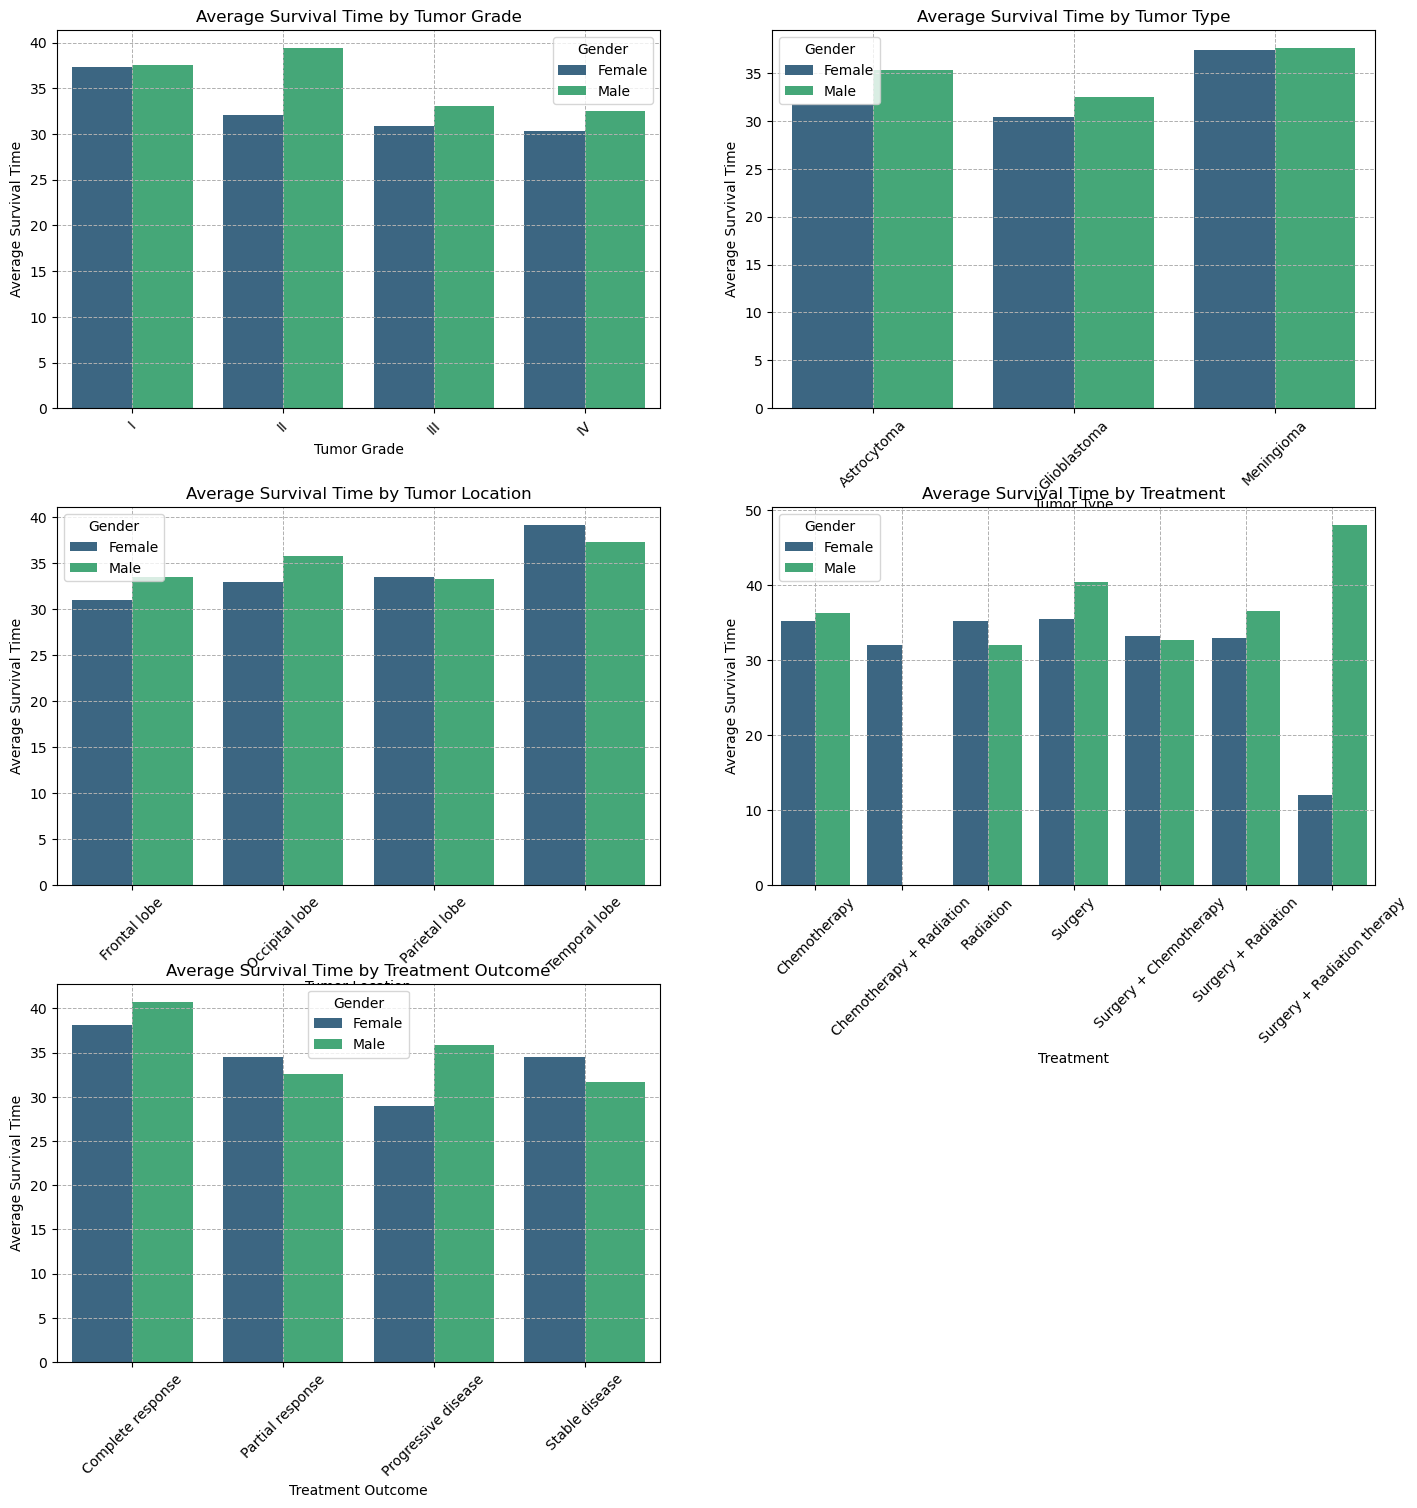

In [743]:
 def plot_bar_with_survival_time(column, df, ax):
    # Aggregating survival time by category
    survival_data = df.groupby([column, 'Gender'])['Survival Time (months)'].mean().reset_index()
    survival_data = survival_data.rename(columns={'Survival Time (months)': 'Average Survival Time'})
    
    sns.barplot(x=column, y='Average Survival Time', data=survival_data, palette='viridis', hue='Gender', ax=ax)
    ax.set_title(f'Average Survival Time by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Average Survival Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Plotting each subplot
plot_bar_with_survival_time('Tumor Grade', df, axes[0, 0])
plot_bar_with_survival_time('Tumor Type', df, axes[0, 1])
plot_bar_with_survival_time('Tumor Location', df, axes[1, 0])
plot_bar_with_survival_time('Treatment', df, axes[1, 1])
plot_bar_with_survival_time('Treatment Outcome', df, axes[2, 0])

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.show()


In [744]:
print(list(df.columns))

['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Time to Recurrence (months)', 'Recurrence Site', 'Survival Time (months)']


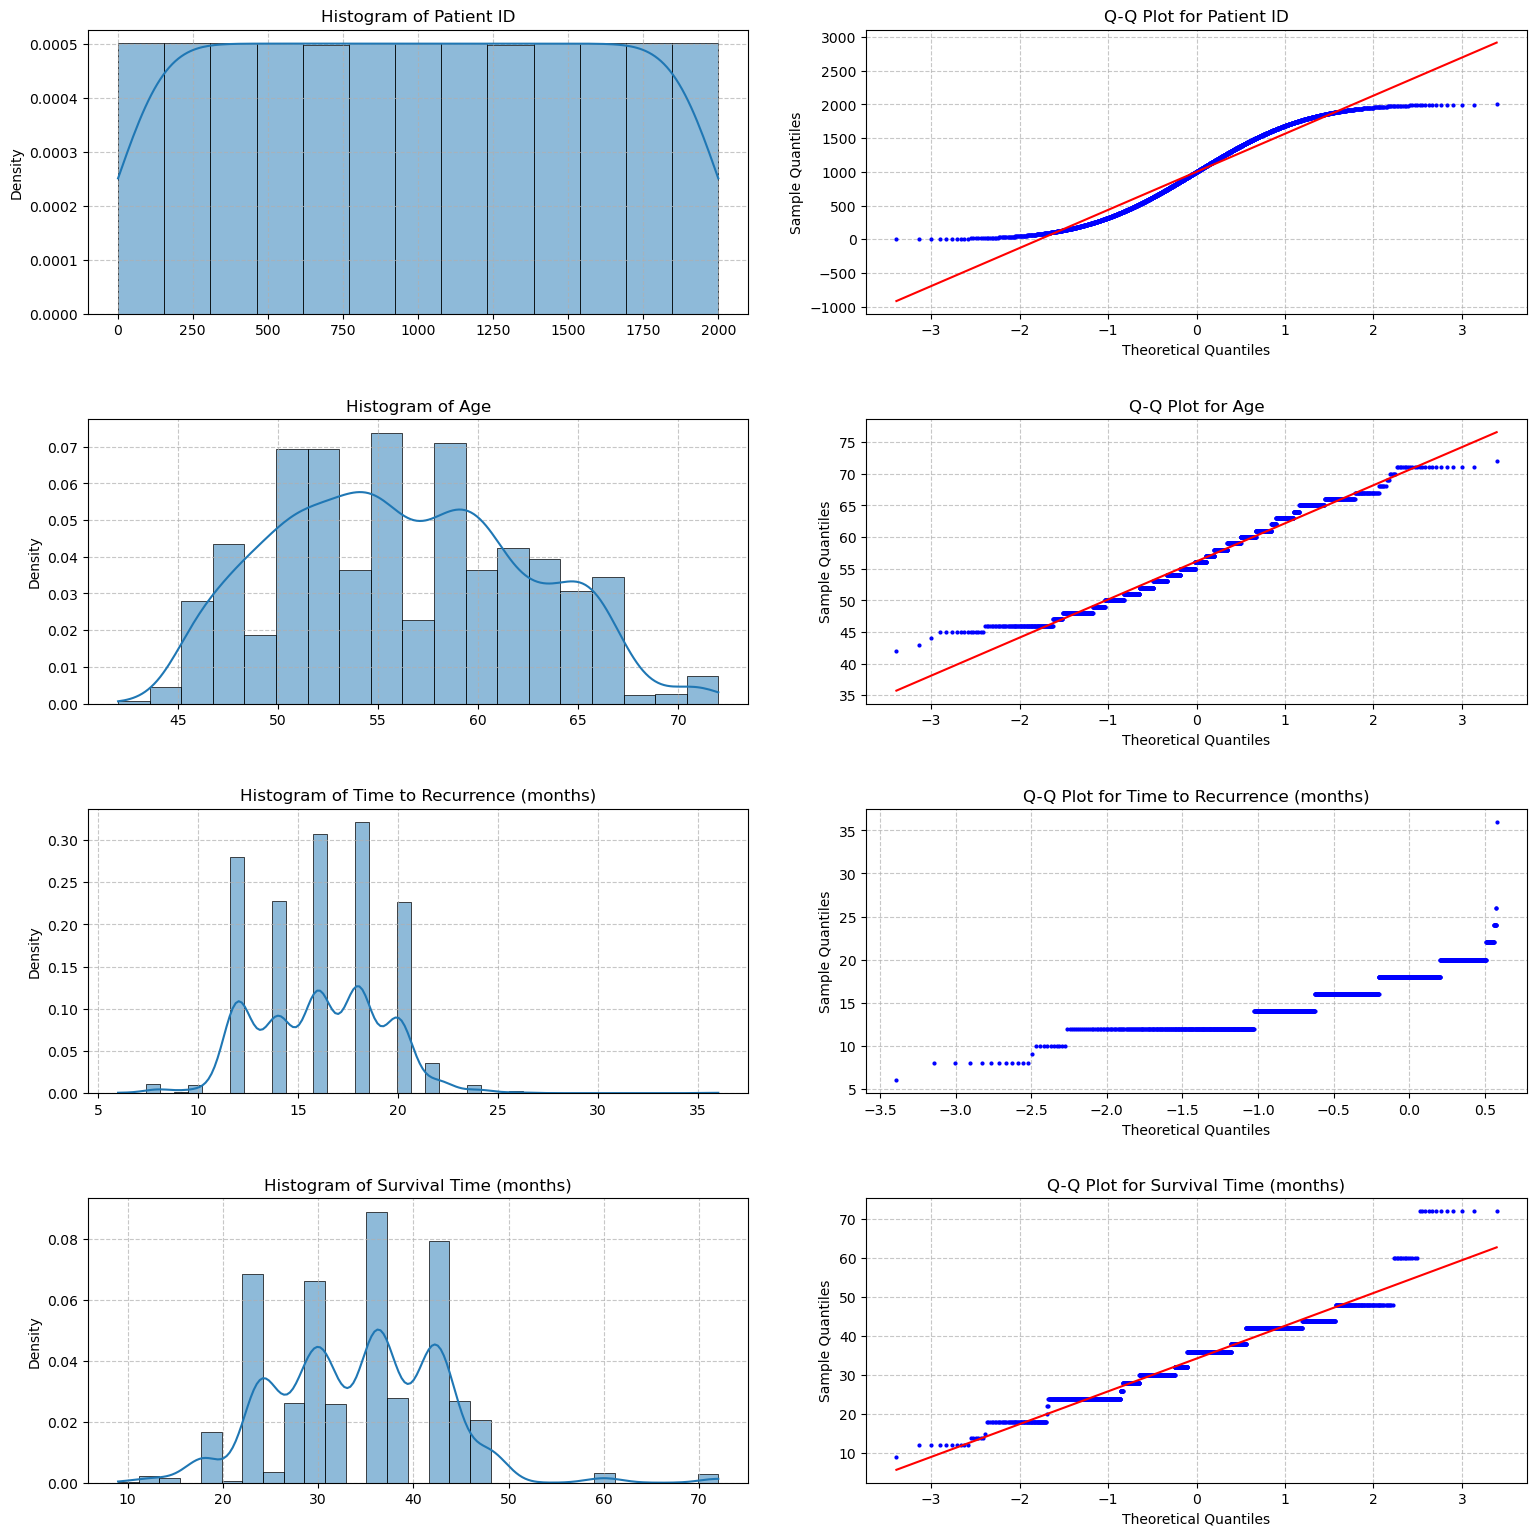

In [746]:
import scipy.stats as stats
#create a figure and axes for subplot
num_cols=len(numerical_columns)
fig,axes=plt.subplots(num_cols, 2, figsize=(16,num_cols*4))
#Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], 
                 stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)

#Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

#Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

# Data Preprocessing

# First Approach: Dropping Features with Missing Values

In [749]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome',
       'Time to Recurrence (months)', 'Recurrence Site',
       'Survival Time (months)'],
      dtype='object')

In [750]:
df[['Gender', 'Tumor Type', 'Tumor Grade','Tumor Location', 'Treatment', 'Treatment Outcome']]

,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome
0,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response
1,Female,Meningioma,I,Parietal lobe,Surgery,Complete response
2,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease
3,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response
4,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response
...,...,...,...,...,...,...
1995,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease
1996,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response
1997,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response
1998,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease


# Categorical Encoding:Label Encoding
Categorical Encoding:
For encoding categorical variables, Label Encoding was used instead of One-Hot Encoding.

La Encodinging
This technique was chosen for its simplicity and efficiency. It converts categorical values into numeric labels, where each unique category is assigned a distinct integer. This method is particularly suitable when the categorical variables have a natural ordering or when the number of categories is manageable.

In [754]:
from sklearn.preprocessing import LabelEncoder

In [755]:
label_encoder = LabelEncoder()
df1=df[['Gender', 'Tumor Type', 'Tumor Grade','Tumor Location', 'Treatment', 'Treatment Outcome']]
encoded_df=pd.DataFrame()
for column in df1.columns:
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(df1[column])

In [756]:
df['Age']

0       45
1       55
2       60
3       50
4       65
        ..
1995    49
1996    57
1997    45
1998    62
1999    53
Name: Age, Length: 2000, dtype: int64

In [757]:
encoded_df['Age']=df['Age'] 

In [758]:
x=encoded_df
y=df['Survival Time (months)']

In [759]:
x

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Age
0,1,1,3,0,3,1,45
1,0,2,0,2,3,0,55
2,1,0,2,1,4,2,60
3,0,1,3,3,6,0,50
4,1,0,1,0,6,1,65
...,...,...,...,...,...,...,...
1995,0,2,0,2,2,2,49
1996,1,1,3,1,3,0,57
1997,0,2,0,3,0,1,45
1998,1,0,2,0,2,3,62


In [769]:
y

0       18
1       36
2       22
3       12
4       48
        ..
1995    32
1996    38
1997    44
1998    28
1999    32
Name: Survival Time (months), Length: 2000, dtype: int64

# Feature Scaling
Feature Scaling
Standard Scaling was applied to the dataset instead of normalization.

Standard Scaling
This technique standardizes features by removing the mean and scaling to unit variance. Standard Scaling is effective for models that assume normally distributed data, such as linear models and gradient boosting algorithms. It ensures that each feature contributes equally to the model by transforming the features to have a mean of 0 and a standard deviation of 1.f 1.

In [772]:
from sklearn.preprocessing import StandardScaler

In [774]:
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_features, columns=x.columns)

In [776]:
X=scaled_df

In [778]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [780]:
y_test

1860    36
353     36
1333    38
905     30
1289    38
        ..
965     30
1284    44
1739    42
261     42
535     24
Name: Survival Time (months), Length: 400, dtype: int64

In [782]:
df.to_csv('Data_Sets/filtered_data.csv', index=False)

# Model Building

In [785]:
import joblib
import os

In [787]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [789]:
# Train and evaluate the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R² score:", r2_xgb)


# Train and evaluate the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM R² score:", r2_svm)


# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R² score:", r2_dt)


# Train and evaluate the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R² score:", r2_lr)



gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting Regressor R² score:", r2_gbr)

XGBoost R² score: 0.7195538282394409
SVM R² score: 0.36491780997125634
Decision Tree R² score: 0.6154564666727599
Linear Regression R² score: 0.20762888784466538
Gradient Boosting Regressor R² score: 0.506994403086096


# Model Performance
The performance of different regression algorithms was evaluated based on their R² scores, which measure the proportion of variance explained by the model. Below are the R² scores for each model:

XGBoost: R² score = 0.7196
XGBoost performed the best among the models tested, achieving an R² score of approximately 0.72. This indicates a relatively good fit to the data, explaining around 72% of the variance in survival time.

# XGBoost with Hyperparameter Tuning

In [792]:
from sklearn.model_selection import RandomizedSearchCV

In [793]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1]        # L2 regularization term on weights
}

In [797]:
# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50,
                                       scoring='r2', cv=5, verbose=1, random_state=42)

# Perform randomized search on the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and best R² score
print("Best parameters found: ", randomized_search.best_params_)
print("Best R² score: {:.2f}".format(randomized_search.best_score_))

# Get the best model
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

# Save the model to a folder named 'ML_MODEL'
#if not os.path.exists('ML_MODEL'):
    #os.makedirs('ML_MODEL')

#model_path = 'ML_MODEL/xgboost_regressor.pkl'
#joblib.dump(model, model_path)
#print(f'Model saved at {model_path}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best R² score: 0.74
Test R² score: 0.74


In [798]:
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.5,
    'reg_alpha': 0.1,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}

xgb_model = XGBRegressor(**best_params)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/xgb_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Test R² score: 0.74
Model saved at ML_MODEL/xgb_model.pkl


### Improved XGBoost Model with Enhanced Data Handling (First Approach: Dropping Columns with Missing Values)
Initial Data Handling
Dropping Columns with Missing Values: Initially, columns containing missing values were removed from the dataset. With this approach, the XGBoost model achieved an R² score of 0.76, indicating that it explained approximately 76% of the variance in survival time.

This is the result of the first approach. Now, let's proceed to the second approach.

# Second Approach: Dropping Rows with Missing Values

#### Dropping Rows with Missing Values
In a second approach, rows with missing values were removed instead of columns. By retaining columns but removing rows with incomplete data, the model could leverage more features and achieve a better fit. The improved model performance indicates that removing rows with missing values is more effective for this dataset, leading to a more accurate model for predicting survival time. This approach preserves the richness of the features while ensuring that the remaining data is complete and usable for model training.

In [804]:
df2=df.dropna()

In [806]:
df2

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
5,6,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
7,8,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,64,Male,Astrocytoma,III,Frontal lobe,Chemotherapy,Stable disease,14.0,Frontal lobe,26
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [808]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3=df2[['Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome','Recurrence Site']]
encoded_df=pd.DataFrame()
for column in df3.columns:
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(df3[column])

In [810]:
encoded_df

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Recurrence Site_encoded
0,1,1,3,0,3,1,3
1,1,0,2,1,4,2,0
2,1,0,1,0,6,1,0
3,1,1,3,0,3,1,3
4,1,0,2,1,4,2,0
...,...,...,...,...,...,...,...
1433,1,0,2,0,0,3,0
1434,0,2,0,2,2,2,2
1435,0,2,0,3,0,1,3
1436,1,0,2,0,2,3,0


In [812]:
X=encoded_df.copy()

In [814]:
df2['Age'].reset_index().drop('index',axis=1)

,Age
0,45
1,60
2,65
3,45
4,60
...,...
1433,64
1434,49
1435,45
1436,62


In [816]:
X['Age']=df2['Age'].reset_index().drop('index',axis=1)
X['Time to Recurrence (months)']=df2['Time to Recurrence (months)'].reset_index().drop('index',axis=1)

In [818]:
X

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Recurrence Site_encoded,Age,Time to Recurrence (months)
0,1,1,3,0,3,1,3,45,10.0
1,1,0,2,1,4,2,0,60,14.0
2,1,0,1,0,6,1,0,65,24.0
3,1,1,3,0,3,1,3,45,10.0
4,1,0,2,1,4,2,0,60,14.0
...,...,...,...,...,...,...,...,...,...
1433,1,0,2,0,0,3,0,64,14.0
1434,0,2,0,2,2,2,2,49,18.0
1435,0,2,0,3,0,1,3,45,20.0
1436,1,0,2,0,2,3,0,62,22.0


In [820]:
y=df2['Survival Time (months)'].reset_index().drop('index',axis=1)

In [822]:
y

,Survival Time (months)
0,18
1,22
2,48
3,18
4,22
...,...
1433,26
1434,32
1435,44
1436,28


In [824]:
X

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Recurrence Site_encoded,Age,Time to Recurrence (months)
0,1,1,3,0,3,1,3,45,10.0
1,1,0,2,1,4,2,0,60,14.0
2,1,0,1,0,6,1,0,65,24.0
3,1,1,3,0,3,1,3,45,10.0
4,1,0,2,1,4,2,0,60,14.0
...,...,...,...,...,...,...,...,...,...
1433,1,0,2,0,0,3,0,64,14.0
1434,0,2,0,2,2,2,2,49,18.0
1435,0,2,0,3,0,1,3,45,20.0
1436,1,0,2,0,2,3,0,62,22.0


In [826]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

In [828]:
scaled_df

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Recurrence Site_encoded,Age,Time to Recurrence (months)
0,0.993070,0.231607,1.167687,-1.281275,-0.806070,-1.290868,1.290669,-1.711970,-1.950447
1,0.993070,-1.029951,0.319211,-0.421511,-0.041473,-0.054180,-1.285891,0.637686,-0.671349
2,0.993070,-1.029951,-0.529265,-1.281275,1.487720,-1.290868,-1.285891,1.420904,2.526397
3,0.993070,0.231607,1.167687,-1.281275,-0.806070,-1.290868,1.290669,-1.711970,-1.950447
4,0.993070,-1.029951,0.319211,-0.421511,-0.041473,-0.054180,-1.285891,0.637686,-0.671349
...,...,...,...,...,...,...,...,...,...
1433,0.993070,-1.029951,0.319211,-1.281275,-3.099859,1.182508,-1.285891,1.264261,-0.671349
1434,-1.006978,1.493166,-1.377741,0.438252,-1.570666,-0.054180,0.431816,-1.085395,0.607749
1435,-1.006978,1.493166,-1.377741,1.298016,-3.099859,-1.290868,1.290669,-1.711970,1.247299
1436,0.993070,-1.029951,0.319211,-1.281275,-1.570666,1.182508,-1.285891,0.950973,1.886848


In [830]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

In [834]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1]        # L2 regularization term on weights
} 

# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50,
                                       scoring='r2', cv=5, verbose=1, random_state=42)

# Perform randomized search on the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and best R² score
print("Best parameters found: ", randomized_search.best_params_)
print("Best R² score: {:.2f}".format(randomized_search.best_score_))

# Get the best model
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/r2_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best R² score: 0.84
Test R² score: 0.93
Model saved at ML_MODEL/r2_model.pkl


In [836]:
df

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,NaN,NaN,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [838]:
best_params = {
    'subsample': 0.8,
    'reg_lambda': 0.1,
    'reg_alpha': 0,
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}

xgb_model = XGBRegressor(**best_params)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))


Test R² score: 0.93


# Improved XGBoost Model with Enhanced Data Handling (Second Approach: Dropping Rows with Missing Values)
Dropping Rows with Missing Values
By removing rows with any missing values, the model's performance significantly improved to an R² score of 0.93. This approach preserved more features, leading to a more accurate model.

This is the result of the second approach. Now, let's proceed to the third approach.

# Third Approach: Handling Missing Data

#### Third Approach: Handling Missing Data
Handling Missing Values
In this third approach, different strategies were used to handle missing values in specific columns:

Time to Recurrence (months): Missing values in this column were filled with the mean value of the column.
Recurrence Site: Missing values in this column were filled with the mode (most frequent value) of the column.

In [843]:
df

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,NaN,NaN,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [845]:
df.groupby(['Tumor Type'])['Time to Recurrence (months)'].mean()

Tumor Type
Astrocytoma     16.444079
Glioblastoma    15.372428
Meningioma      16.517442
Name: Time to Recurrence (months), dtype: float64

In [847]:
df.groupby(['Tumor Type','Gender','Tumor Location'])['Time to Recurrence (months)'].mean()

Tumor Type    Gender  Tumor Location
Astrocytoma   Female  Frontal lobe      16.758621
                      Occipital lobe    14.523810
                      Parietal lobe     16.349515
                      Temporal lobe     18.181818
              Male    Frontal lobe      17.950413
                      Occipital lobe    16.450000
                      Parietal lobe     15.500000
                      Temporal lobe     16.671875
Glioblastoma  Female  Frontal lobe      14.448276
                      Occipital lobe    16.485714
                      Parietal lobe     14.556522
                      Temporal lobe     13.333333
              Male    Frontal lobe      14.472222
                      Occipital lobe    13.300000
                      Parietal lobe     18.145455
                      Temporal lobe     15.818182
Meningioma    Female  Frontal lobe      16.987952
                      Occipital lobe    16.857143
                      Parietal lobe     17.833333
             

In [849]:
df[df['Time to Recurrence (months)'].isnull()]

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
6,7,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
8,9,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation,Complete response,NaN,NaN,12
11,12,48,Male,Meningioma,I,Frontal lobe,Surgery + Radiation,Complete response,NaN,NaN,60
...,...,...,...,...,...,...,...,...,...,...,...
1983,1984,59,Female,Meningioma,I,Parietal lobe,Surgery + Radiation,Complete response,NaN,NaN,38
1986,1987,58,Male,Glioblastoma,IV,Parietal lobe,Surgery + Chemotherapy,Complete response,NaN,NaN,38
1990,1991,56,Female,Meningioma,I,Occipital lobe,Surgery + Chemotherapy,Complete response,NaN,NaN,38
1993,1994,57,Male,Glioblastoma,IV,Parietal lobe,Surgery + Radiation,Complete response,NaN,NaN,38


In [851]:
df['Time to Recurrence (months)']=df['Time to Recurrence (months)'].fillna(round(df['Time to Recurrence (months)'].mean(),2))

In [853]:
 df['Recurrence Site']

0       Temporal lobe
1                 NaN
2        Frontal lobe
3                 NaN
4        Frontal lobe
            ...      
1995    Parietal lobe
1996              NaN
1997    Temporal lobe
1998     Frontal lobe
1999    Parietal lobe
Name: Recurrence Site, Length: 2000, dtype: object

In [855]:
df.groupby(['Tumor Type'])['Recurrence Site'].count() 

Tumor Type
Astrocytoma     608
Glioblastoma    486
Meningioma      344
Name: Recurrence Site, dtype: int64

In [857]:
df['Recurrence Site'].value_counts()

Recurrence Site
Frontal lobe      414
Temporal lobe     381
Parietal lobe     367
Occipital lobe    276
Name: count, dtype: int64

In [859]:
df['Recurrence Site'].mode()

0    Frontal lobe
Name: Recurrence Site, dtype: object

In [861]:
df['Tumor Location'].value_counts()

Tumor Location
Frontal lobe      515
Parietal lobe     503
Temporal lobe     497
Occipital lobe    485
Name: count, dtype: int64

In [863]:
print(df[df['Tumor Location']=='Frontal lobe']['Recurrence Site'].mode())
print(df[df['Tumor Location']=='Parietal lobe']['Recurrence Site'].mode())
print(df[df['Tumor Location']=='Temporal lobe']['Recurrence Site'].mode())
print(df[df['Tumor Location']=='Occipital lobe']['Recurrence Site'].mode())

0    Frontal lobe
Name: Recurrence Site, dtype: object
0    Parietal lobe
Name: Recurrence Site, dtype: object
0    Temporal lobe
Name: Recurrence Site, dtype: object
0    Occipital lobe
Name: Recurrence Site, dtype: object


In [865]:
mode_frontal = df[df['Tumor Location'] == 'Frontal lobe']['Recurrence Site'].mode()[0]
mode_parietal = df[df['Tumor Location'] == 'Parietal lobe']['Recurrence Site'].mode()[0]
mode_temporal = df[df['Tumor Location'] == 'Temporal lobe']['Recurrence Site'].mode()[0]
mode_occipital = df[df['Tumor Location'] == 'Occipital lobe']['Recurrence Site'].mode()[0]

# Define a function to fill missing values based on 'Tumor Location'
def fill_recurrence_site(row):
    if pd.isnull(row['Recurrence Site']):
        if row['Tumor Location'] == 'Frontal lobe':
            return mode_frontal
        elif row['Tumor Location'] == 'Parietal lobe':
            return mode_parietal
        elif row['Tumor Location'] == 'Temporal lobe':
            return mode_temporal
        elif row['Tumor Location'] == 'Occipital lobe':
            return mode_occipital
    else:
        return row['Recurrence Site']

# Apply the function to fill missing values
df['Recurrence Site'] =df.apply(fill_recurrence_site, axis=1)

In [867]:
df

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,16.1,Parietal lobe,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,16.1,Temporal lobe,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,16.1,Occipital lobe,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [869]:
label_encoder = LabelEncoder()
df5=df[['Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome','Recurrence Site']]
encoded_df=pd.DataFrame()
for column in df5.columns:
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(df5[column])

In [871]:
encoded_df['Age']=df['Age']
encoded_df['Time to Recurrence (months)']=df['Time to Recurrence (months)']

In [873]:
encoded_df

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Recurrence Site_encoded,Age,Time to Recurrence (months)
0,1,1,3,0,3,1,3,45,10.0
1,0,2,0,2,3,0,2,55,16.1
2,1,0,2,1,4,2,0,60,14.0
3,0,1,3,3,6,0,3,50,16.1
4,1,0,1,0,6,1,0,65,24.0
...,...,...,...,...,...,...,...,...,...
1995,0,2,0,2,2,2,2,49,18.0
1996,1,1,3,1,3,0,1,57,16.1
1997,0,2,0,3,0,1,3,45,20.0
1998,1,0,2,0,2,3,0,62,22.0


In [875]:
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(encoded_df)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

In [877]:
X=scaled_df.copy()

In [879]:
y=df['Survival Time (months)']

In [881]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1]        # L2 regularization term on weights
} 

# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50,
                                       scoring='r2', cv=5, verbose=1, random_state=42)

# Perform randomized search on the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and best R² score
print("Best parameters found: ", randomized_search.best_params_)
print("Best R² score: {:.2f}".format(randomized_search.best_score_))

# Get the best model
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/best_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best R² score: 0.81
Test R² score: 0.82
Model saved at ML_MODEL/best_model.pkl


In [882]:
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.1,
    'reg_alpha': 0,
    'n_estimators': 100,
    'max_depth': 7,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 1.0
}

# Initialize and train the XGBoost model with the best parameters
model = XGBRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R² score
test_r2_score = r2_score(y_test, y_pred)
print(f"Test R² score: {test_r2_score:.2f}")

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/xgboost_best_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Test R² score: 0.81
Model saved at ML_MODEL/xgboost_best_model.pkl


First Aproah:Dropping Columns with Missing Values:
This initial approach resulted in an R² score of 0.76. Although simple, this method led to the loss of potentially valuable features.

Second Aproach:Dropping Rows with Missing Values:
By removing rows with any missing values, the model's performance significantly improved to an R² score of 0.93. This approach preserved more features, leading to a more accurate model.

Third Aproach:Imputation Methods:
Mean Imputation for the "Time to Recurrence (months)" column and Mode Imputation for the "Recurrence Site" column. This strategy yielded an R² score of 0.81. It offered a balanced method of retaining data and dealing with missing values effectively.

In [884]:
import pandas as pd

# Assuming original X is a DataFrame or has named columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and X_test to DataFrames (if they are not already)
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)

# Define expected columns
expected_columns = X_train.columns.tolist()

### Conclusion
This notebook explored various data preprocessing techniques and their impacts on the performance of the XGBoost model in predicting the survival time of brain tumor patients. The following approaches were tested:

#### First Aproah:Dropping Columns with Missing Values:
This initial approach resulted in an R² score of 0.76. Although simple, this method led to the loss of potentially valuable features.

#### Second Aproach:Dropping Rows with Missing Values:
By removing rows with any missing values, the model's performance significantly improved to an R² score of 0.93. This approach preserved more features, leading to a more accurate model.

#### Third Aproach:Imputation Methods:
Mean Imputation for the "Time to Recurrence (months)" column and Mode Imputation for the "Recurrence Site" column. This strategy yielded an R² score of 0.81. It offered a balanced method of retaining data and dealing with missing values effectively.

#### Key Findings:
The best model performance was achieved by dropping rows with missing values, resulting in an R² score of 0.93. This method demonstrated the highest accuracy by maintaining a comprehensive feature set while ensuring data completeness.
Imputation methods provided a middle-ground approach, with an R² score of 0.81, balancing data retention and model performance.
Dropping columns with missing values was the least effective, resulting in the lowest R² score of 0.76.

#### Conclusion:
The choice of data handling techniques significantly affects model performance. For this dataset, dropping rows with missing values emerged as the most effective approach, achieving the highest R² score. Hyperparameter tuning using RandomizedSearchCV was essential in optimizing the XGBoost model and further enhancing its predictive accuracy. The findings underscore the importance of carefully selecting data preprocessing strategies and optimizing model parameters to achieve superior predictive performance.

This comprehensive analysis highlights the impact of data preprocessing and model tuning on the accuracy of predictive models, providing valuable insights for similar predictive tasks in healthcare and other domains.


In [886]:
import nbformat

# Load the notebook
with open('Braintumor_SurvivalRate.ipynb', 'r') as f: 
    notebook = nbformat.read(f, as_version=4)


#Print the content of the notebook cells
for cell in notebook.cells:
    if cell.cell_type == 'code':
        print(cell.source)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Data_Sets/Brain_tumor.csv')
df.head()
df.info
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)
list(df.columns)
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(ex